In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import metrics
import sklearn.metrics as metrics

In [2]:
data = pd.read_csv("./Life Expectancy Data.csv")

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.shape

(2938, 22)

* Country : Ülke
* Year : Yıl
* Status : Ülkelerin Gelişmişlik Durumu
* Life Expectancy : Yaşta, yaşam beklentisi
* Adult Mortality : Her iki cinsiyette yetişkin ölüm oranları (1000 nüfus başına 15 ila 60 gün arasında ölme olasılığı)
* İnfant Deaths : 1000 kişi başına bebek ölüm sayısı
* Alcohol : Kişi başı kaydedilen tüketim (litre saf alkol cinsinden)
* Percentage Expenditure : Kişi başına Gayri Safi Yurtiçi Hasıla'nın sağlık harcamaları yüzdesi 
* Hepatitis B : 1 yaşındaki çocuklarda Hepatit B aşılama oranı.
* Measles : Kızamık 1000 kişi başına belirtilen vaka sayısı.
* BMI : Tüm nüfusun ortalama Vücut Kitle İndeksi.
* under five deaths : 1000 kişi başına beş yaş altı ölüm sayısı.
* Polio : 1 yaşındakiler arasında Çocuk Felci (Pol3) aşı kapsamı (% 'lik olarak).
* Total expenditure : Toplam devlet harcamalarının yüzdesi olarak genel devlet sağlık harcamaları (%).
* Diphtheria : 1 yaşındaki çocuklarda difteri tetanoz toksoidi ve boğmaca (DTP3) aşılama kapsamı (%).
* HIV/AIDS : 1 000 canlı doğum başına ölüm HIV/AIDS (0-4 yaş).
* GSYİH : Kişi başına düşen Gayri Safi Yurtiçi Hasıla (ABD Doları cinsinden).
* Population : Ülkenin nüfusu.
* thinness 1-19 years : 1-19 Yaş Arası Çocuk ve Ergenlerde Zayıflık Yaygınlığı (%).
* thinness 5-9 years : 5-9 yaş arası çocuklarda zayıflığın yaygınlığı(%).
* Income composition of resources : Kaynakların gelir bileşimi açısından İnsani Gelişme Endeksi (0 ile 1 arasında değişen endeks).
* Schooling : Okullaşma yılı sayısı(yıl).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
data.columns = data.columns.str.strip() #kolon isimleri içerisinde başına ve sonunda boşluk olan sütün isimlerini kaldırır.

In [9]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
# Kategorik sütunları görselleştirmek için fonksiyon..

def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    
    if x_axis: # x ekseni için
        order = data[x_axis].value_counts().iloc[:top].index
        
    else : # y ekseni için
        order = data[y_axis].value_counts().iloc[:top].index
        
    graph = sns.countplot(x = x_axis, y = y_axis, data = train, hue = hue, order = order)
    for container in graph.containers:
        graph.bar_label(container)
        
        
        
    plt.xticks(rotation = rotation)
    plt.show()

In [11]:
# kategorik değişkenler için pasta grafiği

def pie_plot(column_name):
    
  plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
  plt.show()

In [12]:
def histogram(column_name):
    
    
    plt.figure(figsize=(15, 20))


    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1)

        sns.histplot(x = col, data = data, kde = True)
        
        plt.title(col) 
        plt.xlabel("") 
        plt.ylabel("") 

    
    plt.tight_layout(pad = 2)

    plt.show()


In [13]:
def box_plot(x_axis = None, y_axis = None):
   
    sns.boxplot(x = x_axis, y = y_axis, data = data)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

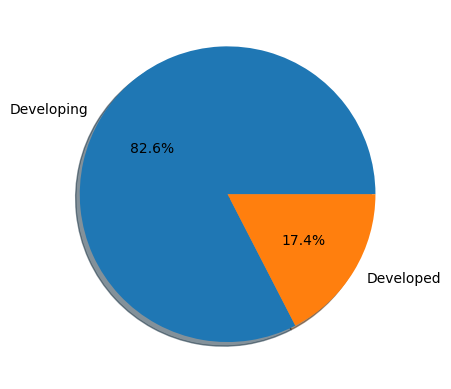

In [14]:
pie_plot ("Status")

In [15]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [16]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [17]:
def fill_data_with_median():
    return data.fillna(data.median(numeric_only=True))


data = fill_data_with_median()



In [18]:
data.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

In [19]:
numerical_column = data.select_dtypes(exclude = object).columns.tolist()
numerical_column.remove("Year")

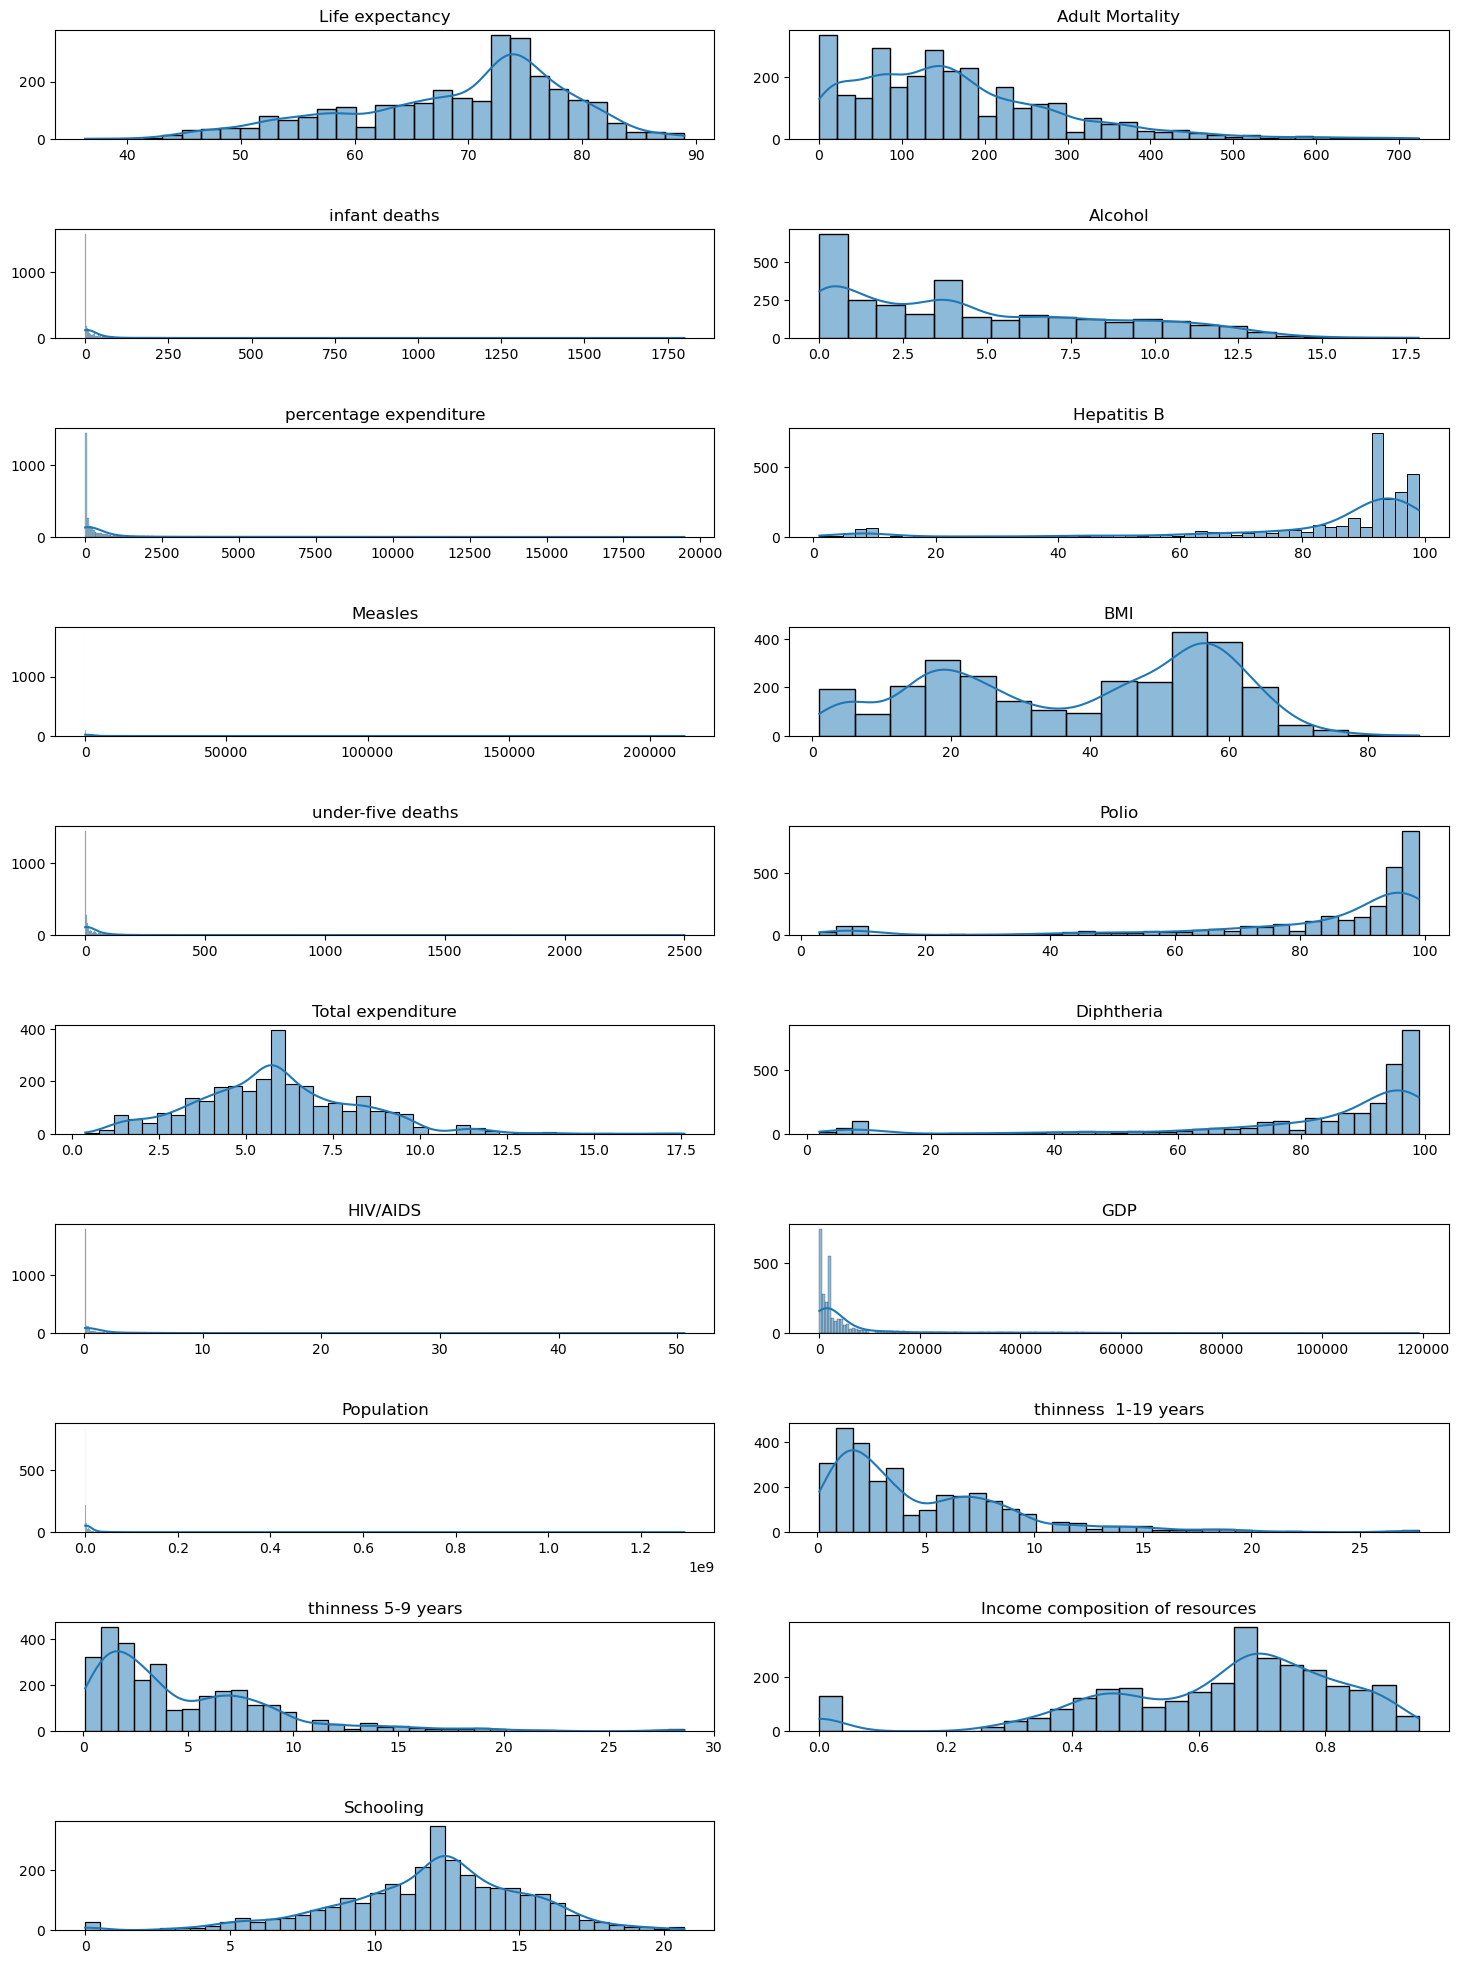

In [20]:
histogram(numerical_column)

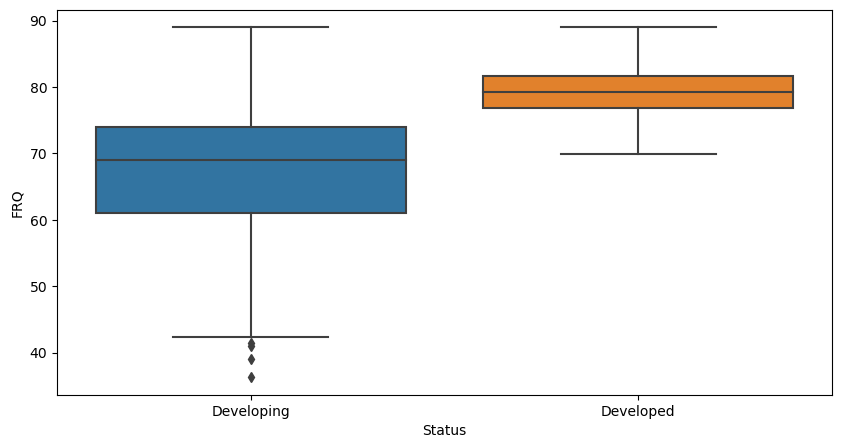

In [21]:
plt.figure(figsize=(10,5))
box_plot(x_axis = "Status", y_axis = "Life expectancy")

In [22]:
df = pd.DataFrame(data)


ilk_on_ulke_life_expectancy = df[['Country', 'Life expectancy']].sort_values(by='Life expectancy', ascending=False).head(10)

print(ilk_on_ulke_life_expectancy)

          Country  Life expectancy
1850  New Zealand             89.0
915       Finland             89.0
241       Belgium             89.0
2433        Spain             89.0
2513       Sweden             89.0
995       Germany             89.0
1916       Norway             89.0
2056     Portugal             89.0
1293        Italy             89.0
937        France             89.0


In [23]:
son_on_ulke_life_expectancy = df[['Country', 'Life expectancy']].sort_values(by='Life expectancy', ascending=True).head(20)

print(son_on_ulke_life_expectancy)

           Country  Life expectancy
1127         Haiti             36.3
2312  Sierra Leone             39.0
2311  Sierra Leone             41.0
2309  Sierra Leone             41.5
2308  Sierra Leone             42.3
1585        Malawi             43.1
2307  Sierra Leone             43.3
1584        Malawi             43.5
2921        Zambia             43.8
1583        Malawi             44.0
2933      Zimbabwe             44.3
2306  Sierra Leone             44.3
1484       Lesotho             44.5
2934      Zimbabwe             44.5
2932      Zimbabwe             44.6
2920        Zambia             44.6
1582        Malawi             44.6
1485       Lesotho             44.8
2935      Zimbabwe             44.8
1581        Malawi             45.1


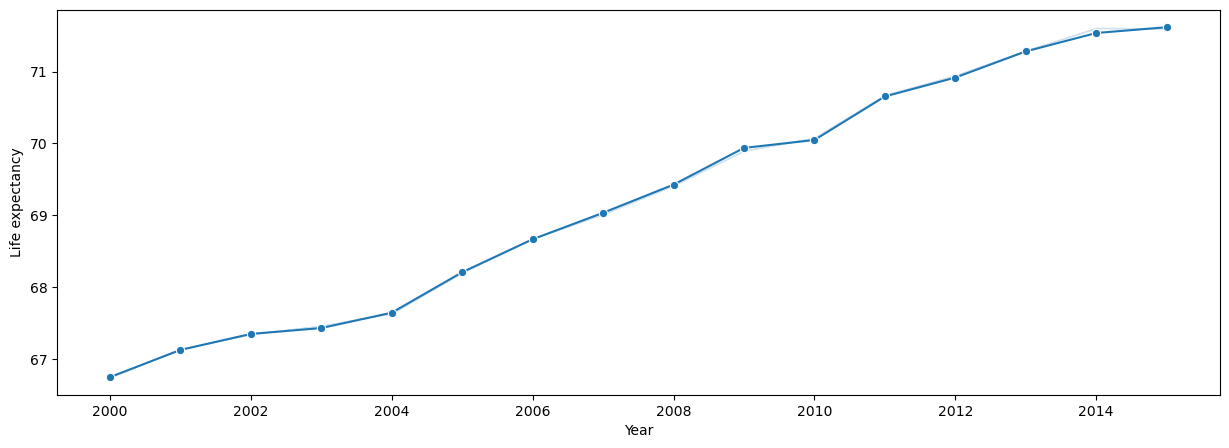

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Year', y= 'Life expectancy',data=data, marker = 'o', errorbar=('ci',False))
plt.show()

In [25]:
numerical_column.remove("Life expectancy")
def create_scatterplot(x_axis, column_name):
    
    plt.figure(figsize=(15, 20))

    #sayısal kolonlar için döngü;
    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1) 
        #len(column_name) ile sütun sayısını, 
        # // 2 ile iki sıra olacak şekilde bölerek subplotların düzenini belirler. 
        #index + 1 ile her bir subplot'un konumunu belirler.
    
        sns.scatterplot(x = x_axis, y = col, data = data)
        
        plt.title(col) 
        plt.xlabel("") 
        plt.ylabel("") 

    plt.tight_layout(pad = 2)

    plt.show()

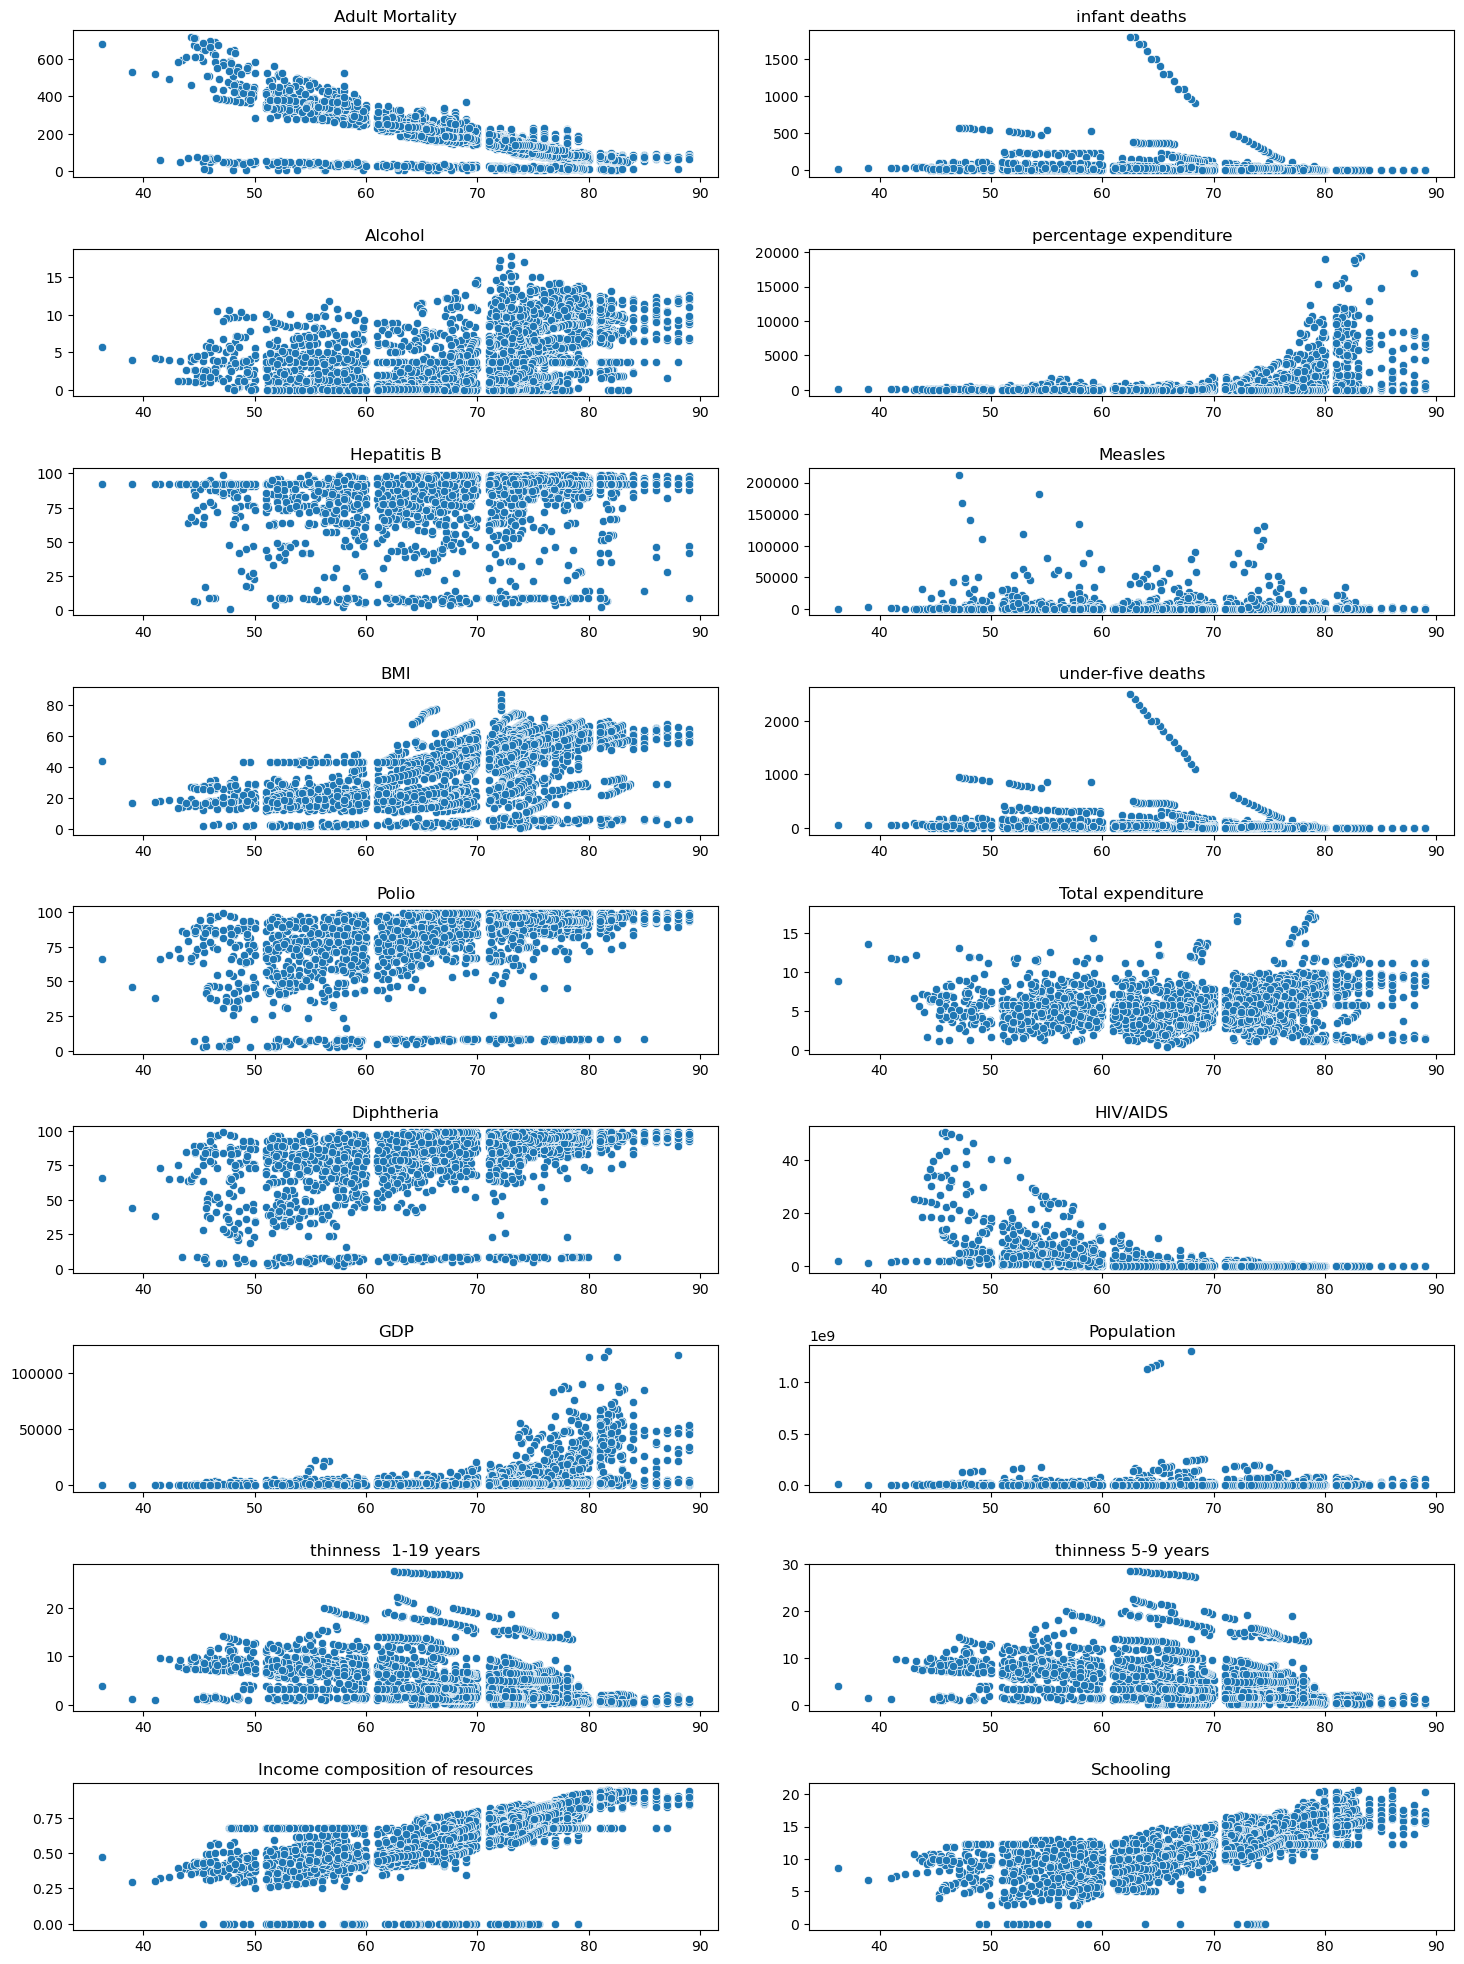

In [26]:
create_scatterplot("Life expectancy", numerical_column)

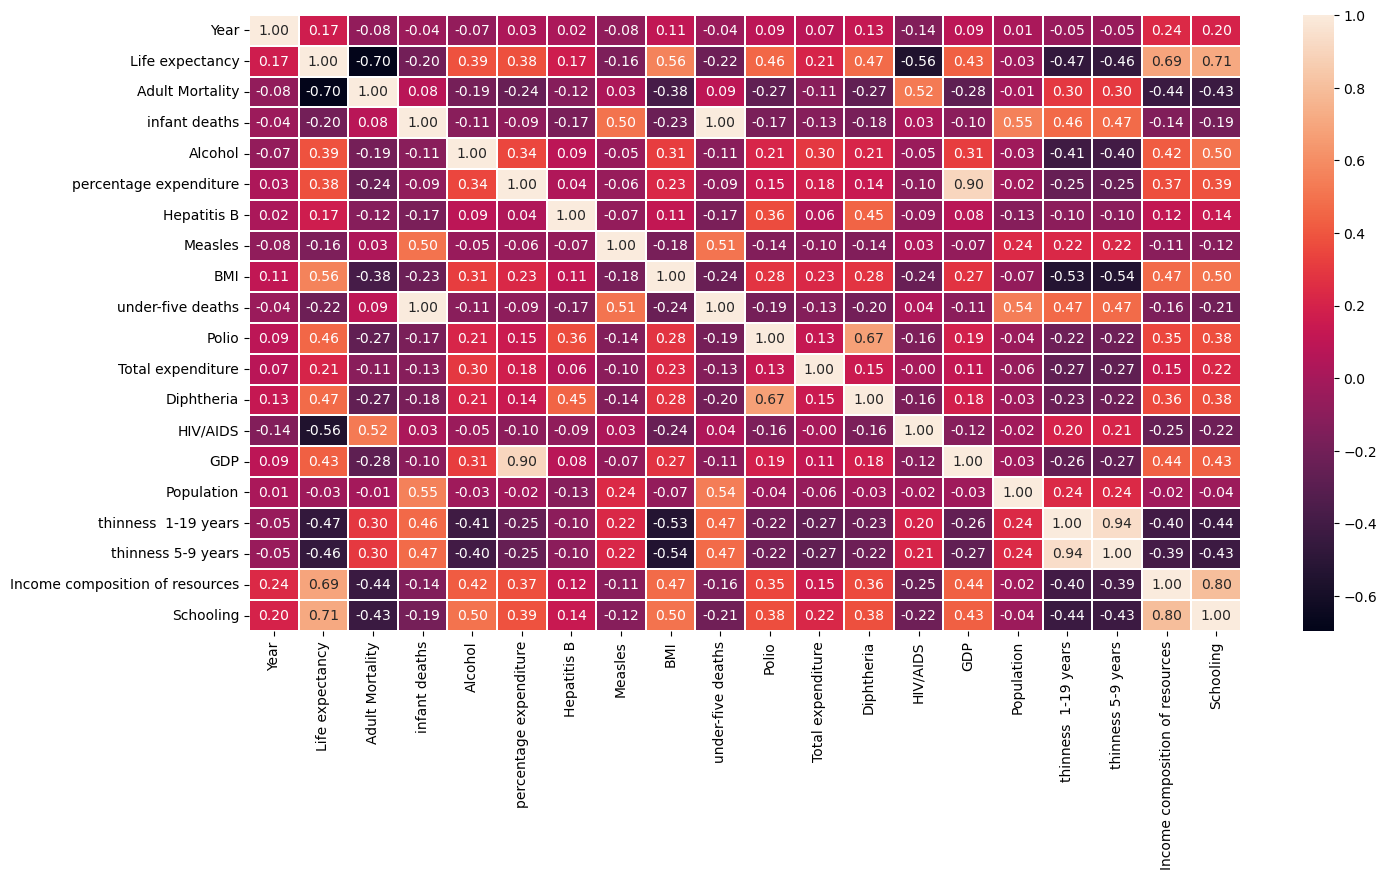

In [27]:
# sayısal sutunlar arasındaki korelasyon matrisi;
plt.figure(figsize = (16,8))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

* 0 a yakın değerler iki değişken arasında belirli bir lineer ilişkinin olmadığı anlamına gelir.
* Yüksek korelasyonlu iki değişken arasında bir ilişki varsa, bu değişkenler arasında çoklu doğrusal bağlantı olabilir. Bu durum, regresyon modellerinde istenmeyen bir durumdur.
* Modelleme aşamasında, aynı bilgiyi taşıyan ve birbirleriyle yüksek korelasyona sahip olan değişkenleri modelde kullanmak, overfitting'e sebep olabilir.


In [28]:
turkey_data = df[df['Country'] == 'Turkey']
print(turkey_data)

     Country  Year      Status  Life expectancy  Adult Mortality  \
2681  Turkey  2015  Developing             75.8             16.0   
2682  Turkey  2014  Developing             75.5             17.0   
2683  Turkey  2013  Developing             75.2             19.0   
2684  Turkey  2012  Developing             74.8            112.0   
2685  Turkey  2011  Developing             74.5            114.0   
2686  Turkey  2010  Developing             74.2            116.0   
2687  Turkey  2009  Developing             73.9            118.0   
2688  Turkey  2008  Developing             73.5            121.0   
2689  Turkey  2007  Developing             73.2            124.0   
2690  Turkey  2006  Developing             72.8            126.0   
2691  Turkey  2005  Developing             72.4            129.0   
2692  Turkey  2004  Developing             72.0            132.0   
2693  Turkey  2003  Developing             71.6            135.0   
2694  Turkey  2002  Developing             71.2 

In [29]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [31]:
#object değişkenlerin  kategorik değişkenlere dönüşümü,
data.Country=pd.Categorical(data.Country)
data.Status=pd.Categorical(data.Status)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   category
 1   Year                             2938 non-null   int64   
 2   Status                           2938 non-null   category
 3   Life expectancy                  2938 non-null   float64 
 4   Adult Mortality                  2938 non-null   float64 
 5   infant deaths                    2938 non-null   int64   
 6   Alcohol                          2938 non-null   float64 
 7   percentage expenditure           2938 non-null   float64 
 8   Hepatitis B                      2938 non-null   float64 
 9   Measles                          2938 non-null   int64   
 10  BMI                              2938 non-null   float64 
 11  under-five deaths                2938 non-null   int64   
 12  Polio 

In [33]:
data2 = data.copy()

In [34]:
data2.head(1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1


In [35]:
# Ülke Değişkenini Dummy değişkene çevirme;
Country_dummies =pd.get_dummies(data2['Country'],drop_first = True)
Country_dummies

,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
##Country dummy hata kontrol;
Country_dummies['check'] = Country_dummies.sum(axis=1)
Country_dummies
Country_dummies.drop(['check'], axis=1,inplace=True)
Country_dummies

,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
data2=pd.concat([data2,Country_dummies],axis=1)
data2.head(1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0,0,0,0,0,0,0,0,0,0


In [38]:
Status_dummies=pd.get_dummies(data2['Status'],drop_first=True)
Status_dummies

,Developing
0,1
1,1
2,1
3,1
4,1
...,...
2933,1
2934,1
2935,1
2936,1


In [39]:
data2=pd.concat([data2,Status_dummies],axis=1)

In [40]:
data2.head(1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0,0,0,0,0,0,0,0,0,1


In [41]:
## dummy değişkene çevirdiğim Year ve Status Kolonlarını datadan çıkartıyorum;
data2.drop(['Status','Country'],axis=1, inplace = True)

In [42]:
data2.head(1)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,1


In [43]:
data2.columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen', 'Zambia',
       'Zimbabwe', 'Developing'],
      dtype='object', length=213)

In [44]:
# Modele girmeden ön işlemeye tabii tuttuğum veriyi kaydedip , özellik mühendisliğini tamamlıyorum.
preprocessed_data=data2.copy()
preprocessed_data.to_csv('Data Preprocessed.csv')

In [45]:
#modellemeler için df3 adında bir kopya data oluşturup onun üzerinden çalışıcam.
df3 = preprocessed_data.copy()

# Modelleme;

In [46]:
y=df3["Life expectancy"]
X=df3.drop(["Life expectancy"],axis = 1)

In [47]:
# Eğitim ve Test Setlerinin Oluşturulması;
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42)  

### Standartlaştırma 
* Modellerin daha hızlı ve aykırı gözlemlerin etkisini minimize ederek daha güvenilir eğitilmesine yardımcı olur.

In [48]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [49]:
print ("shape of Training X : ", X_train.shape)
print ("Shape of Validation X :" , X_test.shape)

shape of Training X :  (2350, 212)
Shape of Validation X : (588, 212)


In [50]:
print ("shape of Training y : ", y_train.shape)
print ("Shape of Validation y :" , y_test.shape)

shape of Training y :  (2350,)
Shape of Validation y : (588,)


### Model Kurulumları

#### SVR Model

In [51]:
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [52]:
svm_params = {"C":[10,20,35,50,70]}     #büyük C değerleri, sınıflar arasındaki hataların cezalandırılmasını artırarak modelin eğitim verilerine daha fazla uymasını sağlar. Ancak, çok büyük C değerleri, aşırı uydurmaya neden olabilir
svm_cv_model = GridSearchCV(estimator=svm, param_grid=svm_params, cv = 5 ).fit(X_train,y_train)

In [53]:
svm_cv_model.best_params_

{'C': 35}

In [54]:
svm_model = SVR(C=35).fit(X_train, y_train)

In [57]:
y_pred_svm = svm_model.predict(X_test)
print('MAE ortalama mutlak hata :', metrics.mean_absolute_error(y_test,y_pred_svm))
print("\n")
print('MSE ortalama hata karesi :',metrics.mean_squared_error(y_test, y_pred_svm))
print("\n")
print('RMSE ortalama karekök sapması :', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_svm)))
print("\n")
print('R2 Score (Değişkenlik oranı :)', metrics.r2_score(y_test, y_pred_svm))

MAE ortalama mutlak hata : 1.4937508649027291


MSE ortalama hata karesi : 5.929886093973249


RMSE ortalama karekök sapması : 1.2221910099909625


R2 Score (Değişkenlik oranı :) 0.9315787889350606


#### Random Forest

In [65]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train,y_train)
rf_params = {"max_depth": [35,50,70,85],
             "max_features": [15,30,40],
             "n_estimators": [1500,2000,2500],
             "min_samples_split": [2,5]}

In [66]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 5, n_jobs=-1, verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=50, max_features=15, min_samples_split=5, n_estimators=2000; total time=   4.6s
[CV] END max_depth=50, max_features=30, min_samples_split=2, n_estimators=2000; total time=   9.2s
[CV] END max_depth=35, max_features=15, min_samples_split=2, n_estimators=1500; total time=   4.1s


/Users/utkuozkan/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=50, max_features=15, min_samples_split=5, n_estimators=2000; total time=   5.0s
[CV] END max_depth=50, max_features=30, min_samples_split=2, n_estimators=2000; total time=   8.6s
[CV] END max_depth=35, max_features=15, min_samples_split=2, n_estimators=1500; total time=   4.1s
[CV] END max_depth=50, max_features=30, min_samples_split=5, n_estimators=1500; total time=   5.7s
[CV] END max_depth=35, max_features=15, min_samples_split=2, n_estimators=2500; total time=   8.8s
[CV] END max_depth=50, max_features=10, min_samples_split=2, n_estimators=1500; total time=   4.2s
[CV] END max_depth=50, max_features=10, min_samples_split=5, n_estimators=1500; total time=   3.0s
[CV] END max_depth=50, max_features=15, min_samples_split=2, n_estimators=1500; total time=   4.6s
[CV] END max_depth=50, max_features=15, min_samples_split=5, n_estimators=1500; total time=   3.8s
[CV] END max_depth=50, max_features=30, min_samples_split=2, n_estimators=1500; total time=   6.8s
[CV] END m

[CV] END max_depth=50, max_features=15, min_samples_split=2, n_estimators=2000; total time=   6.1s
[CV] END max_depth=50, max_features=15, min_samples_split=5, n_estimators=2000; total time=   4.6s
[CV] END max_depth=50, max_features=30, min_samples_split=5, n_estimators=1500; total time=   5.0s
[CV] END max_depth=50, max_features=30, min_samples_split=5, n_estimators=2000; total time=   6.5s
[CV] END max_depth=35, max_features=15, min_samples_split=2, n_estimators=2000; total time=   6.5s
[CV] END max_depth=35, max_features=15, min_samples_split=5, n_estimators=1500; total time=   3.4s
[CV] END max_depth=35, max_features=15, min_samples_split=5, n_estimators=2500; total time=   7.2s
[CV] END max_depth=35, max_features=30, min_samples_split=2, n_estimators=2000; total time=   8.3s
[CV] END max_depth=35, max_features=30, min_samples_split=5, n_estimators=1500; total time=   5.1s
[CV] END max_depth=35, max_features=30, min_samples_split=5, n_estimators=2500; total time=   8.8s
[CV] END m

exception calling callback for <Future at 0x2a904e7d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/utkuozkan/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "/Users/utkuozkan/anaconda3/lib/python3.11/site-packages/joblib/parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "/Users/utkuozkan/anaconda3/lib/python3.11/site-packages/joblib/parallel.py", line 834, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/utkuozkan/anaconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/utkuozkan/anaconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGSEGV(-11)}

In [67]:
rf_cv_model.best_params_

{'max_depth': 50,
 'max_features': 30,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [68]:
rf_model = RandomForestRegressor(random_state = 42,
                                 max_depth =50,
                                 max_features =30,
                                 min_samples_split = 2,
                                 n_estimators = 2000)
rf_tuned = rf_model.fit(X_train, y_train)


In [63]:
y_pred_rf = rf_tuned.predict(X_test)
print('MAE ortalama mutlak hata :', metrics.mean_absolute_error(y_test,y_pred_rf))
print("\n")
print('MSE ortalama hata karesi :',metrics.mean_squared_error(y_test, y_pred_rf))
print("\n")
print('RMSE ortalama karekök sapması :', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_rf)))
print("\n")
print('R2 Score (Değişkenlik oranı :)', metrics.r2_score(y_test, y_pred_rf))

MAE ortalama mutlak hata : 1.2885435941043184


MSE ortalama hata karesi : 3.5863502509887244


RMSE ortalama karekök sapması : 1.1351403411491983


R2 Score (Değişkenlik oranı :) 0.9586193691435172


#### GBM (Gradient Boosting Machines)

In [69]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [70]:
%%time
y_pred_gbm = gbm_model.predict(X_test)
print('MAE ortalama mutlak hata :', metrics.mean_absolute_error(y_test,y_pred_gbm))
print("\n")
print('MSE ortalama hata karesi :',metrics.mean_squared_error(y_test, y_pred_gbm))
print("\n")
print('RMSE ortalama karekök sapması :', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_gbm)))
print("\n")
print('R2 Score (Değişkenlik oranı :)', metrics.r2_score(y_test, y_pred_gbm))

MAE ortalama mutlak hata : 1.6839761798739459


MSE ortalama hata karesi : 4.999473925667676


RMSE ortalama karekök sapması : 1.2976810778746626


R2 Score (Değişkenlik oranı :) 0.9423142274133348
CPU times: user 7.19 ms, sys: 4.17 ms, total: 11.4 ms
Wall time: 7.83 ms


#### XGB

In [71]:
xgb = XGBRegressor()

In [78]:
xgb_params = {"learning_rate" : [0.1,0.01, 0.5], # overfittigi engellemek adına, öğrenme oranı hiperparametresi
              "max_depth": [20,30],
              "n_estimators": [500,1000], #kullanılacak olan ağaç sayısını ifade eder.
              "colsample_bytree": [0.4,0.7,1]} # oluşturulan ağaçlardaki değişkenlerden alınacak olan alt küme oranı

In [79]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, n_jobs = -1, verbose = 2). fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, n_estimators=500; total time=   2.7s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=30, n_estimators=500; total time=   2.5s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=20, n_estimators=500; total time=   7.3s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, n_estimators=1000; total time=   2.8s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=30, n_estimators=1000; total time=   3.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=30, n_estimators=500; total time=   7.5s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=30, n_estimators=500; total time=   2.8s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=30, n_estimators=1000; total time=   3.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=30, n_estimators=500; total time=   7.5s
[CV] END colsample_bytr

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=30, n_estimators=500; total time=   8.3s
[CV] END colsample_bytree=0.7, learning_rate=0.5, max_depth=20, n_estimators=500; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.5, max_depth=20, n_estimators=500; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.5, max_depth=20, n_estimators=1000; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.5, max_depth=20, n_estimators=1000; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.5, max_depth=30, n_estimators=500; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.5, max_depth=30, n_estimators=500; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.5, max_depth=20, n_estimators=500; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.5, max_depth=20, n_estimators=1000; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.5, max_depth=20, n_estimators=1000; tota

In [80]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 30,
 'n_estimators': 1000}

In [81]:
xgb_model = XGBRegressor(colsample_bytree = 0.7,
                        learning_rate = 0.01,
                        max_depth = 30,
                        n_estimators = 1000).fit(X_train, y_train)

In [83]:
%%time
y_pred_xgb = xgb_model.predict(X_test)
print('MAE ortalama mutlak hata :', metrics.mean_absolute_error(y_test,y_pred_xgb))
print("\n")
print('MSE ortalama hata karesi :',metrics.mean_squared_error(y_test, y_pred_xgb))
print("\n")
print('RMSE ortalama karekök sapması :', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_xgb)))
print("\n")
print('R2 Score (Değişkenlik oranı :)', metrics.r2_score(y_test, y_pred_xgb))

MAE ortalama mutlak hata : 1.3672083964964161


MSE ortalama hata karesi : 3.7866578029904


RMSE ortalama karekök sapması : 1.169276869050447


R2 Score (Değişkenlik oranı :) 0.9563081467901339
CPU times: user 163 ms, sys: 27.2 ms, total: 190 ms
Wall time: 29 ms


#### R2 Puanına Göre Model Performansları;

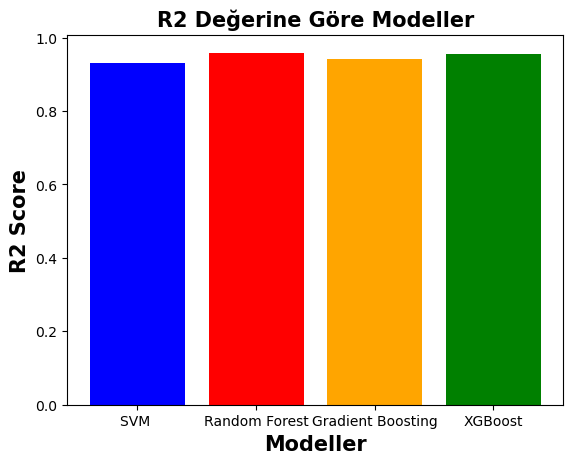

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=20, n_estimators=1000; total time=  23.1s
[CV] END colsample_bytree=1, learning_rate=0.5, max_depth=20, n_estimators=1000; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.5, max_depth=30, n_estimators=500; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=20, n_estimators=1000; total time=  19.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=500; total time=   3.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=1000; total time=   3.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=30, n_estimators=1000; total time=   3.7s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=20, n_estimators=1000; total time=  23.2s
[CV] END colsample_bytree=1, learning_rate=0.5, max_depth=20, n_estimators=1000; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.5, max_depth=30, n_estimators=500; total time=   0.9

In [85]:
svm_model_metrics = metrics.r2_score(y_test, y_pred_svm)
rf_tuned_metrics = metrics.r2_score(y_test, y_pred_rf)
gbm_model_metrics = metrics.r2_score(y_test, y_pred_gbm)
xgb_model_metrics = metrics.r2_score(y_test, y_pred_xgb)

models = ['SVM ', 'Random Forest', 'Gradient Boosting', 'XGBoost']
r2_scores = [svm_model_metrics, rf_tuned_metrics, gbm_model_metrics, xgb_model_metrics]

# Çubuk grafik oluşturma
plt.bar(models, r2_scores, color=['blue', 'red', 'orange', 'green'])
plt.xlabel('Modeller', fontweight='bold', fontsize=15)
plt.ylabel('R2 Score', fontweight='bold', fontsize=15)
plt.title('R2 Değerine Göre Modeller', fontweight='bold', fontsize=15)

# Grafik gösterme
plt.show()